# **Lab #3**: Neural Network Models in Machine Learning  
- *Marcel Castro*  
- *Ulises Fonseca*



# **1. Introduction**  
The dataset used is called the "Bike Sharing Dataset", which contains bike rental data in Washington D.C. by hour and by day. The goal is to build a regression model to predict the total number of rented bikes. The main columns are:

| Column      | Description |
|-------------|-------------|
| instant     | Record index |
| dteday      | Date of the record |
| season      | Season (1: Winter, 2: Spring, 3: Summer, 4: Fall) |
| yr          | Year (0: 2011, 1: 2012) |
| mnth        | Month (1 to 12) |
| hr          | Hour of the day (0 to 23) |
| holiday     | Is it a holiday? (0: No, 1: Yes) |
| weekday     | Day of the week (0: Sunday, 6: Saturday) |
| workingday  | Is it a working day? (0: No, 1: Yes) |
| weathersit  | Weather situation (1: Clear, 4: Heavy rain) |
| temp        | Normalized temperature (value between 0 and 1) |
| atemp       | Normalized "feels like" temperature (value between 0 and 1) |
| hum         | Relative humidity (value between 0 and 1) |
| windspeed   | Normalized wind speed (value between 0 and 1) |
| casual      | Number of casual users (non-registered) |
| registered  | Number of registered users |
| cnt         | Total number of rented bikes (casual + registered) |


# **2. Library and Dataset Loading**


In [3]:
# Import de librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import time

In [4]:
# Carga del dataset
# Cargar el dataset desde una URL alternativa
bikes = "https://raw.githubusercontent.com/fmezacr/DataScienceTEC/refs/heads/master/hour.csv"

try:
    bike_data = pd.read_csv(bikes)
    print("Dataset cargado con éxito.")
    print(bike_data.head())
except Exception as e:
    print(f"Ocurrió un error al cargar el dataset: {e}")

Dataset cargado con éxito.
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


# **3. Data Visualization**


In [5]:
print(bike_data.info())
bike_data.head(4500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,4496,2011-07-11,3,0,7,5,0,1,1,1,0.66,0.6212,0.74,0.1343,5,21,26
4496,4497,2011-07-11,3,0,7,6,0,1,1,1,0.68,0.6364,0.74,0.1940,19,102,121
4497,4498,2011-07-11,3,0,7,7,0,1,1,1,0.70,0.6667,0.74,0.2537,28,289,317
4498,4499,2011-07-11,3,0,7,8,0,1,1,1,0.74,0.6970,0.66,0.2836,35,385,420


# **4. Data Preprocessing**

In [6]:
# Eliminamos la columna instant y dteday
# NOTA: TALVEZ SE PUEDE EXTRAER EL DIA EXACTO DE CADA DTEDAY, POR VALORAR SI QUEREMOS OPTIMIZAR LA CUESTION
bike_data = bike_data.drop(columns=['instant', 'dteday'], axis=1)

In [ ]:
# Se verifica si existen valores faltantes
print("Valores faltantes por columna:")
print(bike_data.isnull().sum())

Valores faltantes por columna:
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# Se normalizan o estandarizan variables
# Selección de columnas que necesitan normalización
to_normalize_features = ['casual', 'registered', 'cnt']

# Normalización usando MinMaxScaler
scaler = MinMaxScaler()
bike_data[to_normalize_features] = scaler.fit_transform(bike_data[to_normalize_features])
bike_data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,0.008174,0.014673,0.015369
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,0.021798,0.036117,0.039959
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,0.013624,0.030474,0.031762
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,0.008174,0.011287,0.012295
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.000000,0.001129,0.000000


In [ ]:
# ERA UNA OPCION HACERLES ONE HOT ENCODE A ESTAS VARIABLES PERO IGUAL SE OBTUVIERON BUENOS RESULTADOS
# Se codifican variables categóricas
# Se aplica One-Hot Encoding a las variables categóricas
# categorical_features = ['season', 'weathersit', 'weekday', 'mnth', 'hr']
# bike_data = pd.get_dummies(bike_data, columns=categorical_features)

In [8]:
# Se define el conjunto de características (X) y la variable objetivo (y)
X = bike_data.drop('cnt', axis=1)  # 'cnt' es la variable objetivo
y = bike_data['cnt']

# Se divide en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Datos preparados para el entrenamiento.")

Datos preparados para el entrenamiento.


# **5. Model Design and Training**


In [18]:
# # Se define el modelo de red neuronal
model = Sequential([
    # Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)  # Salida para regresión
])

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mse',
              metrics=['mae'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,241 (40.00 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 0 (0.00 B)

### Explanation of Model Components

* **Number of layers**: We added 3 layers — the first with 128 perceptrons, the next with 64, and an output layer with a single perceptron for prediction.  
* **Regularization and Dropout**: L2 regularization was applied to reduce the risk of overfitting. After the first layer, Dropout with a rate of 0.2 is used to deactivate perceptrons and improve generalization.  
* **Activation function**: We used `relu` for the hidden layers and `linear` for the output layer, since this is a regression problem.  
* **Optimizer**: The Adam optimizer is used with a learning rate of 0.0005, MSE as the loss function, and MAE to evaluate model performance.

**Hyperparameters**:
* Epochs: 150 maximum, with early stopping enabled  
* Batch size: 64  
* Learning rate: 0.0005


In [19]:
# Iniciar un temporizador para medir el tiempo de entrenamiento
start_time = time.time()

# Definir EarlyStopping para detener el entrenamiento si no hay mejora en 'val_loss'
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=150,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

end_time = time.time()

# Calcular el tiempo total de entrenamiento
elapsed_time = end_time - start_time

# Imprimir el tiempo total
minutes, seconds = divmod(elapsed_time, 60)
print(f"Tiempo total de entrenamiento: {int(minutes):02d}:{int(seconds):02d} (mm:ss)")


Epoch 1/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5259 - mae: 0.4589 - val_loss: 0.1082 - val_mae: 0.1088
Epoch 2/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1316 - mae: 0.1707 - val_loss: 0.0999 - val_mae: 0.1219
Epoch 3/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1023 - mae: 0.1342 - val_loss: 0.0788 - val_mae: 0.0792
Epoch 4/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0833 - mae: 0.1045 - val_loss: 0.0690 - val_mae: 0.0650
Epoch 5/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0734 - mae: 0.0895 - val_loss: 0.0622 - val_mae: 0.0593
Epoch 6/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0650 - mae: 0.0747 - val_loss: 0.0581 - val_mae: 0.0628
Epoch 7/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0586 - mae: 0.0658 - val_loss: 0.0496 - val_mae: 0.0310
Epoch 8/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0526 - mae: 0.0556 - val_loss: 0.0462 - val_mae: 0.0357
Epoch 9/150
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

# **6. Training Results and Graphs**


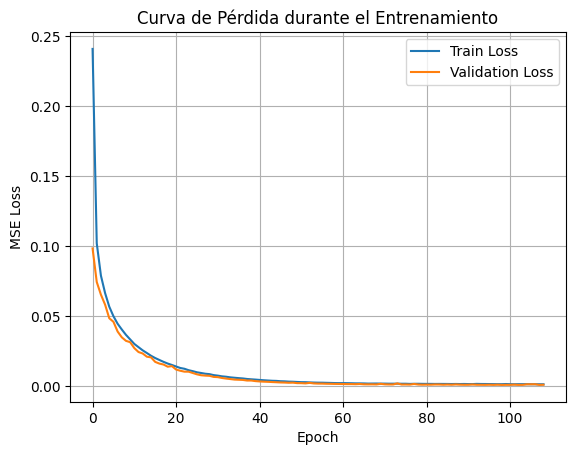

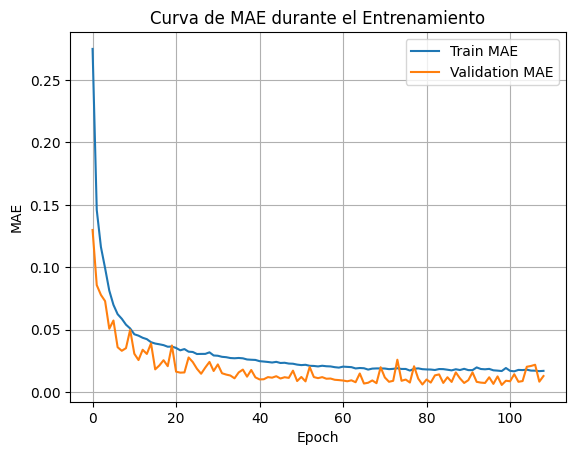

In [11]:
# Graficar la pérdida (MSE) durante el entrenamiento y la validación
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el MAE (Error Absoluto Medio) durante el entrenamiento y la validación
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Curva de MAE durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

The training loss curve is quite similar to the validation loss curve, which is a good indicator that overfitting is not occurring.  
On the other hand, in the MAE curve, we can see that the validation curve fluctuates around the training curve, which is also a good sign of generalization and very minimal overfitting.


# **7. Evaluation on the Test Set**


In [16]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"MAE en conjunto de prueba: {test_mae:.4f}")


MAE en conjunto de prueba: 0.0055


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE en conjunto de prueba: 0.0072


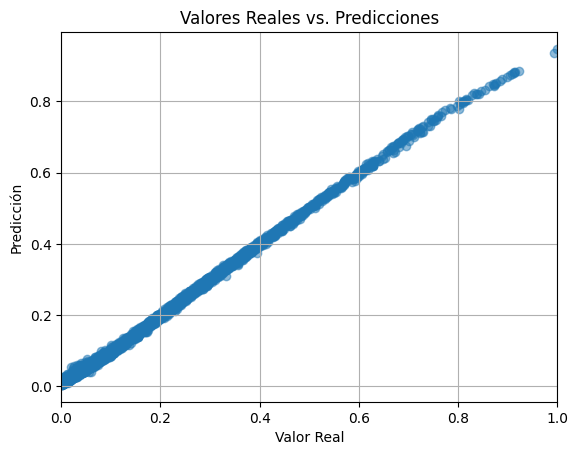

In [15]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE en conjunto de prueba: {rmse:.4f}")

# Graficar los valores reales vs. las predicciones
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.xlim(0,1)
plt.title('Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()

# **8. Mejora del Modelo**

### 1. Hyperparameter Tuning
- **Learning Rate Reduction**: The original learning rate was `0.002`. We reduced it to `0.0005`, allowing the model to adjust its weights more gradually and accurately. A lower learning rate reduces the risk of overshooting the minimum of the loss function, helping to improve accuracy.
- **Batch Size**: We changed the batch size from 32 to 64. This modifies the number of examples the model processes before updating the weights, which can help stabilize the training process. A larger batch size allows for a better direction in weight adjustment.

### 2. L2 Regularization and Dropout
- **L2 Regularization**: We added L2 regularization to the hidden layers, which penalizes large weights. L2 regularization helps prevent the model from relying too heavily on certain features from the training set, improving its generalization ability. It is particularly useful for reducing overfitting.
- **Dropout**: We added a `Dropout` layer with a 20% rate in the hidden layers. Dropout randomly disables some neurons during training, forcing the model to learn more generalized patterns instead of memorizing specific dataset features. This is also effective for preventing overfitting.

### 3. EarlyStopping
- **EarlyStopping**: We configured an `EarlyStopping` callback that halts training when validation loss does not improve for 10 consecutive epochs. Additionally, `EarlyStopping` restores the best weights obtained, preventing the model from overtraining and starting to overfit the training set. This helps keep the model at the point where it generalizes best.

### 4. Increased Training Epochs
- **Number of Epochs**: The model was trained for up to 150 epochs. However, with `EarlyStopping`, training stops automatically if the model reaches its best point before the full 150 epochs, optimizing both training time and model performance.

### Final Result
After these changes:
- **MAE** decreased significantly, indicating greater prediction accuracy.
- **Overfitting Check**: The training loss curve is very similar to the validation loss curve, which is a good sign that overfitting is not occurring. Likewise, the MAE validation curve closely matches the training curve.
- A **MAE** value of 0.0055 was obtained on the test set, and **RMSE** was 0.0072.
